In [3]:
import pandas as pd
import pandas as pd
import numpy as np
from itertools import combinations
from math import comb
from scipy.optimize import minimize
import random
import matplotlib.pyplot as plt
random.seed(0)

In [4]:
df = pd.read_csv('The Real Project File(Portfolio Table).csv')
df.head()

,Names Date,A,AAPL,ABBV,ABT,ACGL,ACN,ADI,ADM,ADP,...,WW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,11/2/2020,0.030855143,-0.000826786,0.037015297,2.25%,0.038232397,0.015121473,-0.000421796,0.050173003,0.022157507,...,0.076559588,0.030414067,0.047217976,0.02498929,0.041998859,0.016639855,0.020572143,0.003179396,0.033246342,0.027373046
1,11/3/2020,0.017008752,0.015353552,-0.003286129,1.94%,0.017376058,0.025069278,0.01071908,-0.01359143,0.031091223,...,0.007901598,0.009601655,-0.016875396,0.016717812,-0.017063895,0.034089677,0.01595797,0.029354054,0.089227803,0.001534778
2,11/4/2020,0.013641027,0.040836602,0.074351989,1.80%,0.00219366,0.009791287,0.051691044,-0.029018855,-0.011412746,...,-0.010452952,0.003170136,0.020785879,-0.003562649,-0.005387618,-0.049885403,0.018704198,0.002859023,0.031201025,0.06871403
3,11/5/2020,0.01705225,0.035493709,-0.008571403,1.79%,-0.002188859,0.026632184,0.035413619,0.030101087,-0.011362226,...,0.034771167,0.011235945,0.052679904,0.013888918,-0.001805639,0.046554517,0.021505326,0.018640373,0.033234105,-0.019787852
4,11/6/2020,0.019938415,-0.001134137,-0.00896578,0.78%,-0.011281749,0.009829427,0.023773054,0.007514101,0.021633513,...,-0.011059133,-0.018055506,-0.000748753,-0.005696538,-0.011757595,0.002862829,-0.01310824,-0.005956238,0.018552268,-0.009654733


In [5]:
print(list(df.columns))

['Names Date', 'A', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV', 'ARE', 'ATI', 'ATO', 'AVB', 'AVY', 'AWK', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BG', 'BH', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CAL', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CMT', 'CNC', 'CNP', 'COF', 'COO', 'COOP', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXDO', 'D', 'DAL', 'DD', 'DDOG', 'DE', 'DECK', 'DELL', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOC', 'DOV', 'DOW', 'DPZ', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXCM', 'EA',

In [ ]:
# =====================================================
#  Portfolio columns (only these are used)
# =====================================================
PORTFOLIO_COLS_INIT = [
    'A', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV', 'ARE', 'ATI', 'ATO', 'AVB', 'AVY', 'AWK', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BG', 'BH', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CAL', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CMT', 'CNC', 'CNP', 'COF', 'COO', 'COOP', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXDO', 'D', 'DAL', 'DD', 'DDOG', 'DE', 'DECK', 'DELL', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOC', 'DOV', 'DOW', 'DPZ', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EME', 'EMN', 'EMR', 'EOG', 'EPAM', 'EQIX', 'EQR', 'EQT', 'ERIE', 'ES', 'ESS', 'ETN', 'ETR', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FCX', 'FDS', 'FDX', 'FE', 'FFIV', 'FICO', 'FIS', 'FITB', 'FLT', 'FOX', 'FOXA', 'FRT', 'FSLR', 'FTNT', 'FTV', 'GD', 'GDDY', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HCA', 'HD', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUBB', 'HUM', 'HWM', 'IBKR', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'INCY', 'INTC', 'INTU', 'INVH', 'IP', 'IPG', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITI', 'ITT', 'ITW', 'IVZ', 'J', 'JBHT', 'JBL', 'JCI', 'JKHY', 'JNJ', 'K', 'KDP', 'KEY', 'KEYS', 'KHC', 'KIM', 'KKR', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEE', 'LEN', 'LH', 'LHX', 'LII', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNT', 'LOW', 'LRCX', 'LULU', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM', 'MLSS', 'MMC', 'MMM', 'MNST', 'MO', 'MOH', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NDSN', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OKE', 'OMC', 'ON', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PANW', 'PAR', 'PAYC', 'PAYX', 'PCAR', 'PCG', 'PEAK', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PLD', 'PLTR', 'PM', 'PNC', 'PNR', 'PNW', 'PODD', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PWR', 'PYPL', 'QCOM', 'RCL', 'REG', 'REGN', 'RF', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCHW', 'SHW', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SPYV', 'SRE', 'STE', 'STLD', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPL', 'TPR', 'TRGP', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TXN', 'TXT', 'TYL', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VICI', 'VLO', 'VMC', 'VRSK', 'VRSN', 'VRTX', 'VST', 'VTR', 'WAB', 'WABC', 'WAT', 'WDAY', 'WDC', 'WEC', 'WELL', 'WFC', 'WMB', 'WMT', 'WRB', 'WSM', 'WST', 'WW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'
]
PORTFOLIO_COLS = random.sample(PORTFOLIO_COLS_INIT, k=21) # Esme's note: it should be k=len(PORTFOLIO_COLS_INIT) in general for a comprehensive search

ANNUAL_FACTOR = 252
MAX_SUBSET_SIZE = 5   # exhaustive for k=2,3,4  # Esme's note: In an actual run, 5 would be 21 (for portfolio build out)
TOP_K = 10            # how many results to show per subset size

In [7]:
# =====================================================
#  Helper functions
# =====================================================
def pct_to_float(x):
    """Convert '0.91%' → 0.0091"""
    if isinstance(x, str) and "%" in x:
        return float(x.replace("%", "")) / 100.0
    try:
        return float(x)
    except:
        return np.nan


def load_portfolio_returns(df_raw):
    """Extract only the 21 assets and convert daily % returns → decimals."""
    cols = [c for c in PORTFOLIO_COLS if c in df_raw.columns]
    df = df_raw[cols].copy()
    for c in df.columns:
        df[c] = df[c].apply(pct_to_float)
    df = df.astype(float)
    df = df.dropna(how="all")  # drop empty rows
    return df


def annual_mean_cov(returns):
    """Annualize mean returns and covariance."""
    mu_daily = returns.mean()
    cov_daily = returns.cov()
    return mu_daily * ANNUAL_FACTOR, cov_daily * ANNUAL_FACTOR


def portfolio_perf(weights, mu_ann, cov_ann):
    """Return (ann_return, ann_vol, sharpe)."""
    w = np.array(weights)
    ann_ret = w @ mu_ann
    ann_vol = np.sqrt(w @ cov_ann @ w)
    sharpe = ann_ret / ann_vol if ann_vol > 0 else -np.inf
    return ann_ret, ann_vol, sharpe


def optimize_sharpe(mu, cov):
    """Long-only Sharpe maximization with constraints."""
    n = len(mu)
    x0 = np.ones(n) / n
    bounds = [(0, 1)] * n
    cons = [{'type': 'eq', 'fun': lambda w: w.sum() - 1}]

    def neg_sharpe(w):
        _, _, s = portfolio_perf(w, mu, cov)
        return -s if np.isfinite(s) else 1e6

    res = minimize(neg_sharpe, x0, bounds=bounds, constraints=cons, method="SLSQP")
    if res.success:
        w = res.x
    else:
        w = x0

    return portfolio_perf(w, mu, cov) + (w,)   # return (ret, vol, sharpe, w)


def mean_corr(df):
    """Mean pairwise correlation."""
    corr = df.corr()
    vals = corr.where(np.triu(np.ones_like(corr), k=1).astype(bool)).stack()
    return float(vals.mean()), float(vals.var())


# =====================================================
#  Main search
# =====================================================
def search_portfolios(df_raw):
    returns = load_portfolio_returns(df_raw)
    mu_all, cov_all = annual_mean_cov(returns)
    
    results = []
    assets = list(returns.columns)
    n = len(assets)

    print(f"ℹ️ Using {n} assets. Searching subsets up to size {MAX_SUBSET_SIZE}.")

    for k in range(2, MAX_SUBSET_SIZE + 1):
        print(f"\n▶ Searching all subsets of size {k}  (total {comb(n, k)})")
        for subset in combinations(assets, k):
            subset = list(subset)
            sub_df = returns[subset]
            mu = mu_all[subset]
            cov = cov_all.loc[subset, subset]

            # optimize
            ann_ret, ann_vol, sharpe, w = optimize_sharpe(mu.values, cov.values)

            # correlation
            mcorr, vcorr = mean_corr(sub_df)

            results.append({
                "k": k,
                "subset": tuple(subset),
                "sharpe": sharpe,
                "ann_return": ann_ret,
                "ann_vol": ann_vol,
                "mean_corr": mcorr,
                "var_corr": vcorr,
                "weights": w
            })

    res = pd.DataFrame(results)

    # combined score (normalize)
    def z(x): 
        return (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0

    res["sharpe_z"] = z(res["sharpe"])
    res["vol_z"] = z(-res["ann_vol"])        # lower vol = higher score
    res["corr_z"] = z(-res["mean_corr"])     # lower corr = higher score

    res["combined"] = (
        0.5 * res["sharpe_z"] +
        0.3 * res["corr_z"] +
        0.2 * res["vol_z"]
    )

    return res.sort_values(["k", "combined"], ascending=[True, False])

In [8]:
results = search_portfolios(df)
print(results.groupby("k").head(TOP_K)[["k","subset","sharpe","ann_vol","mean_corr", "var_corr" ,"combined"]])

ℹ️ Using 21 assets. Searching subsets up to size 5.

▶ Searching all subsets of size 2  (total 210)

▶ Searching all subsets of size 3  (total 1330)

▶ Searching all subsets of size 4  (total 5985)

▶ Searching all subsets of size 5  (total 20349)
       k                      subset    sharpe   ann_vol  mean_corr  var_corr  \
193    2                  (KDP, CVX)  1.179233  0.219574   0.103350       NaN   
187    2                  (ETN, CVX)  1.379288  0.224712   0.317556       NaN   
202    2                 (MPWR, CVX)  1.198228  0.266700   0.098103       NaN   
172    2                  (STZ, CVX)  1.353922  0.266649   0.249798       NaN   
32     2                  (HAL, KDP)  1.161838  0.278739   0.060831       NaN   
209    2                  (CVX, LEE)  1.170964  0.273751   0.082464       NaN   
40     2                  (SJM, HWM)  1.136066  0.272686   0.084781       NaN   
55     2                  (SJM, CVX)  1.146982  0.258258   0.121300       NaN   
168    2               

In [9]:
results.groupby("k").head(TOP_K)[["k","subset","sharpe","ann_vol","mean_corr", "var_corr" ,"combined"]].sort_values('sharpe', ascending=False)

,k,subset,sharpe,ann_vol,mean_corr,var_corr,combined
27708,5,"(STZ, ETN, MPWR, CVX, LEE)",1.488454,0.220290,0.206459,0.013719,0.858399
25710,5,"(DTE, STZ, ETN, CVX, LEE)",1.488244,0.220548,0.218212,0.012814,0.854343
12208,5,"(TYL, STZ, ETN, CVX, LEE)",1.488244,0.220549,0.208621,0.013831,0.857501
19144,5,"(SJM, STZ, ETN, CVX, LEE)",1.488244,0.220544,0.163939,0.012171,0.872218
27692,5,"(STZ, ETN, KDP, CVX, LEE)",1.488244,0.220535,0.194706,0.011349,0.862090
7363,4,"(STZ, ETN, CVX, LEE)",1.488243,0.220521,0.205021,0.012205,0.858700
21524,5,"(WEC, STZ, ETN, CVX, LEE)",1.488243,0.220586,0.181485,0.013498,0.866419
19137,5,"(SJM, STZ, ETN, MPWR, CVX)",1.482305,0.223587,0.190364,0.021453,0.860247
4358,4,"(SJM, STZ, ETN, CVX)",1.481806,0.224078,0.221592,0.007947,0.849579
1433,3,"(STZ, ETN, CVX)",1.481806,0.224098,0.298018,0.001765,0.824401


In [10]:
def plot_all_assets(df_raw):
    df = df_raw.copy()

    # --- Parse date column safely ---
    df["Date"] = pd.to_datetime(df.iloc[:, 0], errors="coerce", format="%m/%d/%Y")
    df = df.dropna(subset=["Date"])   # remove rows like "Avg Return", "Regression Statistics"

    # --- Keep only portfolio columns ---
    cols = [c for c in PORTFOLIO_COLS if c in df.columns]
    df = df[["Date"] + cols]

    # --- Convert % strings to floats ---
    for c in cols:
        df[c] = df[c].apply(pct_to_float)

    # --- Plot ---
    plt.figure(figsize=(18, 10))

    for c in cols:
        plt.plot(df["Date"], df[c], label=c)

    plt.title("Daily Returns Over Time for All 21 Portfolio Assets")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.legend(loc="upper left", ncol=3)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

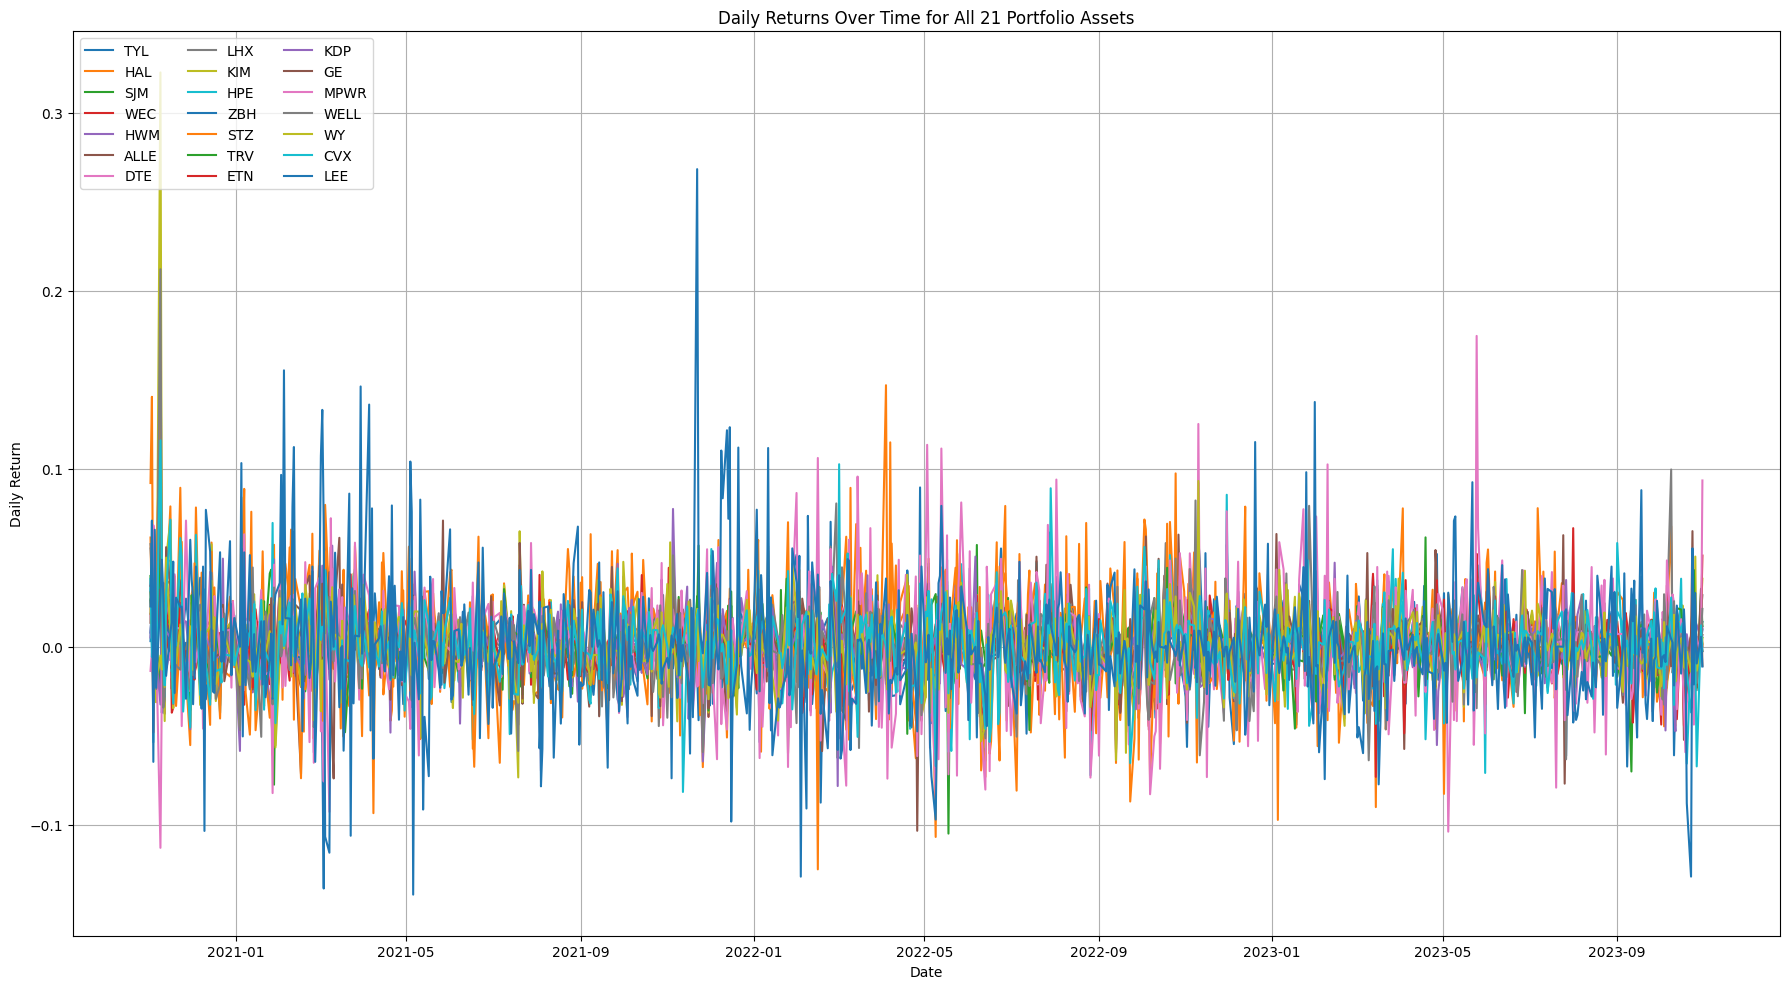

In [11]:
plot_all_assets(df)

In [16]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# -----------------------------
# 1. HRP Util Functions
# -----------------------------

def correl_dist(corr):
    """Convert correlation matrix to distance matrix."""
    return np.sqrt(0.5 * (1 - corr))

def get_quasi_diag(link):
    """
    Sort clustered items using recursive bisection.
    Ensures only valid leaf indices (0..n-1) appear.
    """
    link = np.asarray(link)
    num_items = link.shape[0] + 1

    # Start with the last merge
    ordered = [int(link[-1, 0]), int(link[-1, 1])]

    def expand(node):
        if node < num_items:
            # it's an original asset index
            return [node]
        else:
            # it's a cluster, expand into its two children
            left = int(link[node - num_items, 0])
            right = int(link[node - num_items, 1])
            return expand(left) + expand(right)

    # Expand recursively and flatten
    final_order = []
    for node in ordered:
        final_order.extend(expand(node))

    return final_order

def get_cluster_var(cov, cluster_items):
    """Variance of a cluster"""
    cov_slice = cov[np.ix_(cluster_items, cluster_items)]
    weights = get_ivp(cov_slice)
    return np.dot(weights.T, np.dot(cov_slice, weights))[0, 0]

def get_ivp(cov):
    """Inverse-variance portfolio weights"""
    iv = 1 / np.diag(cov)
    iv /= iv.sum()
    return iv.reshape(-1, 1)

def hrp_allocation(cov, ordered_assets):
    """HRP recursive bisection allocation"""
    w = pd.Series(1, index=ordered_assets)
    clusters = [ordered_assets]

    while len(clusters) > 0:
        next_clusters = []

        for cluster in clusters:
            if len(cluster) <= 1:
                continue

            split = len(cluster) // 2
            c1 = cluster[:split]
            c2 = cluster[split:]

            var1 = get_cluster_var(cov, c1)
            var2 = get_cluster_var(cov, c2)

            alpha = 1 - var1 / (var1 + var2)

            w[c1] *= alpha
            w[c2] *= 1 - alpha

            next_clusters.append(c1)
            next_clusters.append(c2)

        clusters = next_clusters

    return w / w.sum()

# ---------------------------------------------------
# 2. HRP Pipeline Function (the one you'll call)
# ---------------------------------------------------

def run_hrp(df_raw, portfolio_cols):
    df = df_raw.copy()

    # clean percent signs
    for col in portfolio_cols:
        df[col] = df[col].astype(str).str.replace("%", "").astype(float) / 100

    # correlation + cov matrices
    corr = df[portfolio_cols].corr()
    cov = df[portfolio_cols].cov().values

    # cluster distances
    dist = correl_dist(corr)
    link = linkage(squareform(dist), method="ward")

    # ordering assets
    ordered = get_quasi_diag(link)
    ordered_assets = corr.index[ordered].tolist()

    ordered_positions = ordered

    # HRP weights (in integer index form)
    raw_weights = hrp_allocation(cov, ordered_positions)

    # convert to named series for readability
    weights = pd.Series(raw_weights.values, index=corr.index[ordered_positions])
    weights = weights.sort_values(ascending=False)
    
    return weights, corr, link


In [20]:
weights, corr, link = run_hrp(df, PORTFOLIO_COLS_INIT)
print(weights)

JNJ     1.048449e-02
HUM     1.005803e-02
BDX     8.411277e-03
PM      8.030146e-03
T       7.662899e-03
            ...     
ON      3.537861e-04
NCLH    3.207295e-04
CCL     2.935029e-04
LEN     2.603918e-04
ABT     6.636911e-07
Length: 473, dtype: float64


/var/folders/2g/23mmv72s3y59y5qyv84l1pgr0000gp/T/ipykernel_73981/1478529998.py:76: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031 0.67786031
 0.67786031 0.67786031 0.67786031 0.67786031 0.6778

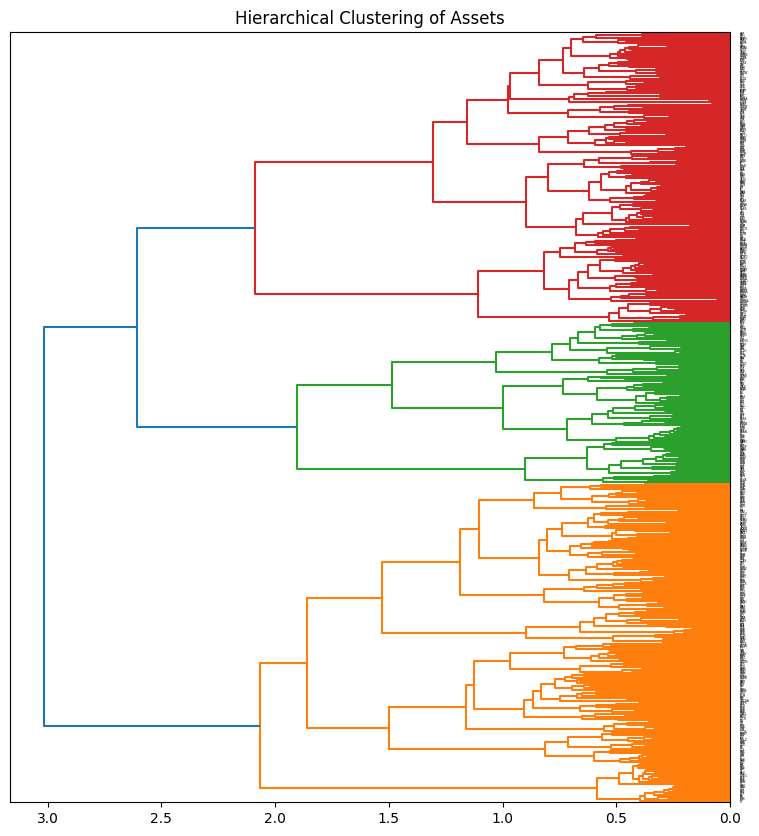

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(18, 10)) # Increased width from 12 to 18

dendrogram(
    link,
    labels=corr.index.tolist(),
    orientation="left",
    leaf_font_size=2  # Try a smaller font size like 8 or 7
)

plt.title("Hierarchical Clustering of Assets")

plt.subplots_adjust(left=0.5)
plt.savefig("Hierarchical_Clustering_Dendrogram.pdf", bbox_inches="tight")

plt.show()

In [22]:
top10 = weights.head(10)
print(top10)

JNJ     0.010484
HUM     0.010058
BDX     0.008411
PM      0.008030
T       0.007663
CME     0.007407
GIS     0.007262
MCD     0.007191
BMY     0.006919
CBOE    0.006915
dtype: float64
